#### Hello everyone,

#### Welcome to this place.

This notebook is a detail of previous notebooks. In my first notebook ( http://nbviewer.jupyter.org/github/frucci/2017/blob/master/word_clustering_pt_1.ipynb ) I've shoved in a couple of ways to do words clustering.

Here I'm going to apply an easy Kmeans into the simple words list I've introduced in the previous notebook.

In this notebook I'll show you a way to visualize the n-dimensional space of word2vec in a bidimensional and more intuitive space.

The dimensionality reduction will be done by applying the famous TSNE (you can find the original paper here http://www.cs.toronto.edu/~hinton/absps/tsne.pdf). You can also find a funny guide here (https://distill.pub/2016/misread-tsne/)

t-SNE is a technique to manage high-dimensional vectors. It turns a list of high-dimensional vectors into a list of lower dimension vectors, while keeping the relative similarity as close to the original data as possible.

This algorithm seems more efficient than others but it looks really slow.

Also if I've spoken about t-SNE as a trasformation for dimensionality reduction I've introduced you as a tool for data visualization. Some people use t-SNE as dimensionality reduction tool, others don't. I'm in this second category, because t-SNE cannot fit in a fixed dataset and transform in another dataset. It's a bit awkward because if you have a new row you have to "re-train" the entire dataset if you want to transform the new row.

#### STRATEGY:

In this notebook I'll show you an already known (if you've followed my previous works) KMeans as words clustering method. When the label will be founded I'll show you a two-dimensional plot of this cluster.

In [1]:
import pandas as pd
import numpy as np
from gensim.models import KeyedVectors

from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

import matplotlib.pyplot as plt

c:\users\e3850003\appdata\local\continuum\anaconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
Slow version of gensim.models.doc2vec is being used


In [2]:
words = ['man','woman','girl','boy','father','grandfather','grandmother',
         'one','two','three','four','five','seven',
         'dog','cat','rabbit',
         'queen','king','princess',
         'text','word','mail','letter',
         'laptop','desktop','keyboard','monitor',
         'kitchen','bathroom','bedroom','room',
         'shoes','skirt','dress','shirt',
         'apple','pear','banana','watermelon','peach',
         'blue','red','white','yellow','black','brown',
         'school','university','class','course','teacher',
         'finance','corporate','economic','price','stock'
]

words.sort()
lwords = len(words)

In [3]:
%%time
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

Wall time: 52.7 s


In [4]:
matrix = pd.DataFrame(0, index=words, columns = ['w2v_'+str(i) for i in range(0,300)])
for w in words:
    matrix.loc[w] =  model.word_vec(w)
    
matrix.head()

,w2v_0,w2v_1,w2v_2,w2v_3,w2v_4,w2v_5,w2v_6,w2v_7,w2v_8,w2v_9,...,w2v_290,w2v_291,w2v_292,w2v_293,w2v_294,w2v_295,w2v_296,w2v_297,w2v_298,w2v_299
apple,-0.064453,-0.160156,-0.012085,0.134766,-0.229492,0.162109,0.304688,-0.179688,-0.121094,0.253906,...,-0.126953,-0.039795,0.131836,-0.166016,0.125000,0.051270,-0.149414,0.136719,-0.020752,0.343750
banana,-0.085449,0.047119,-0.069336,0.302734,-0.187500,-0.031982,0.029541,-0.205078,-0.090332,0.298828,...,-0.177734,-0.082520,0.038574,-0.294922,0.005524,0.054443,-0.094727,0.126953,0.117188,0.177734
bathroom,-0.047363,0.036133,-0.023926,-0.161133,0.098633,0.098145,-0.061768,-0.017212,0.515625,-0.031128,...,-0.084473,0.021118,0.090820,-0.023438,-0.087402,-0.163086,-0.135742,0.023193,0.000824,0.158203
bedroom,0.167969,-0.161133,-0.023682,-0.102051,0.408203,0.027832,0.116211,-0.122070,0.287109,0.177734,...,-0.330078,-0.076660,-0.090820,0.131836,-0.100586,-0.341797,-0.006897,-0.087402,0.126953,0.192383
black,0.104980,0.018433,0.008972,-0.012817,-0.028809,-0.059326,-0.089844,-0.068359,0.172852,0.019043,...,-0.014648,-0.024292,-0.281250,0.083496,-0.086426,-0.004333,0.175781,0.092285,0.061035,-0.132812


In [5]:
kmeans_result = KMeans(init='k-means++', n_clusters=12, n_init=10)
kmeans_result.fit(matrix)

evaluation = pd.concat(
    [
        pd.DataFrame(kmeans_result.labels_, columns=['cluster']),
        pd.DataFrame(words, columns=['name'])
    ],
    axis=1)

for i in range(0,12):
    print(evaluation[evaluation['cluster']==i])
    print('\n')

    cluster       name
10        0  corporate
15        0   economic
17        0    finance
30        0    monitor
34        0      price
45        0      stock


    cluster         name
6         1          boy
16        1       father
20        1         girl
21        1  grandfather
22        1  grandmother
29        1          man
53        1        woman


    cluster        name
0         2       apple
1         2      banana
32        2       peach
33        2        pear
51        2  watermelon


    cluster    name
8         3     cat
13        3     dog
37        3  rabbit


    cluster    name
4         4   black
5         4    blue
7         4   brown
38        4     red
52        4   white
55        4  yellow


    cluster      name
2         5  bathroom
3         5   bedroom
25        5   kitchen
39        5      room


    cluster        name
9         6       class
11        6      course
18        6        five
19        6        four
31        6         one
40       

Until this point you can find the explanation on my previous notebook I've linked before. Now I'm going to apply t-SNE.


Keep in mind that t-SNE requires the right tuning of its own hyperparameters. 

The parameters I'll use are not random as well as not tuned. 

My advice is have a look on this funny link if you want to know how the results change together with the hyperpars (https://distill.pub/2016/misread-tsne/)

In [6]:
embedded_matrix = TSNE(n_components=2, perplexity=20, random_state=0, learning_rate=5).fit_transform(matrix)

x0 = embedded_matrix[:,0]
x1 = embedded_matrix[:,1]

In [7]:
x0

array([-0.6577454 , -0.73527822,  1.56602292,  1.62575084,  1.04744526,
        1.2211799 , -1.4543921 ,  0.97330854,  3.15535752, -0.68531028,
       -1.72133286, -0.38495579,  1.23757865,  3.15261343,  3.12613638,
       -1.77729084, -2.60068108, -1.82581445, -0.33247814, -0.33910679,
       -1.388125  , -2.7704646 , -2.5967946 ,  1.36957117, -1.73932268,
        1.53765852,  1.27108993,  1.03486481, -0.42427181, -1.01969235,
        0.31677051,  0.06157336, -0.52820115, -0.59686453, -3.13817721,
       -1.75981975, -1.74787731,  3.07395159,  1.19236404,  1.25278327,
       -1.54906279, -0.36787542,  2.56580532,  2.84036118,  3.17182253,
       -3.1568578 , -1.88847076,  1.08906402, -0.32280817, -0.31404178,
       -1.45550336, -0.64113355,  1.05612003, -1.0727673 ,  0.95871778,
        1.2057506 ])

In [8]:
x1

array([ 3.89210466,  3.70058707, -2.04383723, -2.0946331 ,  1.80722881,
        2.31751249, -2.35030685,  2.22462886, -0.50826328, -0.5638459 ,
        0.99617379, -0.29446652, -3.70913277, -0.51775604,  2.3866046 ,
        1.1703464 , -1.97652378,  1.0207961 ,  0.49351953,  0.48220762,
       -2.42664965, -2.0010456 , -2.12282847, -3.70809642, -3.9858742 ,
       -2.01420438, -3.65882475,  0.46180543,  1.63005935, -2.08441634,
       -0.54709254,  0.17978482,  3.81805539,  3.90653887,  1.11012646,
       -3.90332406, -3.97379636, -0.382633  ,  2.51213007, -1.74894783,
       -0.64145202,  0.55790777,  1.768163  ,  1.35895503,  2.50686674,
        1.12156313, -0.86173238, -0.28948808,  0.47168185,  0.48942906,
       -0.40573379,  3.87177126,  1.90937947, -2.2377028 ,  0.04939818,
        2.70330673])

At this point I've created a two-dimensional transformation of the 56 words we had.

Below you can find the plot of this points colored by the label of the KMeans.

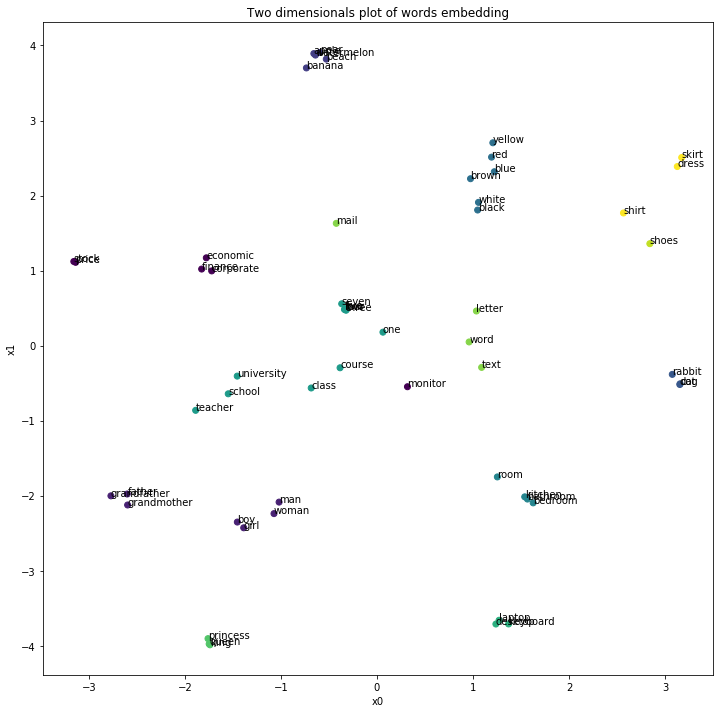

In [9]:
fig, ax = plt.subplots()
fig.set_figheight(12)
fig.set_figwidth(12)
ax.scatter(x0,x1,c=kmeans_result.labels_)
texts = []
for i, txt in enumerate( matrix.index ):
    texts.append(ax.text(x0[i], x1[i], txt))
plt.xlabel('x0')
plt.ylabel('x1')
plt.title('Two dimensionals plot of words embedding')
plt.show()

#### CONCLUSION

In my opinion t-SNE is a cool tool for viz and is one of the "must know" in data science.

Unfortunately its timing, as its memory requires, appear prohibitive with big datasets. 

This is just an example. I can imagine severals way to optimize these lines of code. First of all the tuning of t-SNE. 

I would like to be contacted for you points of view as well as for advices.

##### I hope you will appreciate this example.
##### See you around,
##### Federico